<a href="https://colab.research.google.com/github/HaliullinAnton/DIploma/blob/main/learn_amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import csv
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
dataset = pd.read_csv(r'/content/drive/MyDrive/learning_data/bestsellers with categories.csv')
dataset.columns = ['name', 'author', 'rating', 'reviews', 'price', 'year', 'genre']



In [26]:
#Удаляем дубликаты книг, т.к. в списке присутствуют разные издания одной книги
dataset_clear = dataset.drop_duplicates(subset='name')


In [34]:
# Самые продаваемые книги на amazon, с рейтингом 4.9
best_books = dataset_clear[dataset_clear['rating']  == 4.9]
best_books

,name,author,rating,reviews,price,year,genre
40,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2017,Fiction
81,Dog Man and Cat Kid: From the Creator of Capta...,Dav Pilkey,4.9,5062,6,2018,Fiction
82,Dog Man: A Tale of Two Kitties: From the Creat...,Dav Pilkey,4.9,4786,8,2017,Fiction
83,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2018,Fiction
85,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,4.9,12619,8,2019,Fiction
86,Dog Man: For Whom the Ball Rolls: From the Cre...,Dav Pilkey,4.9,9089,8,2019,Fiction
87,Dog Man: Lord of the Fleas: From the Creator o...,Dav Pilkey,4.9,5470,6,2018,Fiction
146,"Goodnight, Goodnight Construction Site (Hardco...",Sherri Duskey Rinker,4.9,7038,7,2012,Fiction
151,Hamilton: The Revolution,Lin-Manuel Miranda,4.9,5867,54,2016,Non Fiction
153,Harry Potter and the Chamber of Secrets: The I...,J.K. Rowling,4.9,19622,30,2016,Fiction


In [35]:
# Самые обсуждаемые книги
top_10_reviews = dataset_clear.sort_values(by='reviews', ascending=False).head(10)
top_10_reviews

,name,author,rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction
135,Gone Girl,Gillian Flynn,4.0,57271,10,2012,Fiction
365,The Fault in Our Stars,John Green,4.7,50482,13,2012,Fiction
437,The Nightingale: A Novel,Kristin Hannah,4.8,49288,11,2015,Fiction
106,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2012,Fiction
433,The Martian,Andy Weir,4.7,39459,9,2015,Fiction
20,All the Light We Cannot See,Anthony Doerr,4.6,36348,14,2014,Fiction
338,The Alchemist,Paulo Coelho,4.7,35799,39,2014,Fiction


In [36]:
# Авторы, продавшие наибольшее количесвто книг
count_books = dataset_clear.groupby('author').author.agg('count').to_frame('count').reset_index()
top_10_authors = count_books.sort_values(by='count', ascending=False).head(10)
top_10_authors

,author,count
120,Jeff Kinney,12
197,Rick Riordan,10
221,Stephenie Meyer,7
113,J.K. Rowling,6
27,Bill O'Reilly,6
58,Dav Pilkey,6
76,E L James,5
129,John Grisham,5
226,Suzanne Collins,5
219,Stephen King,4


In [37]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


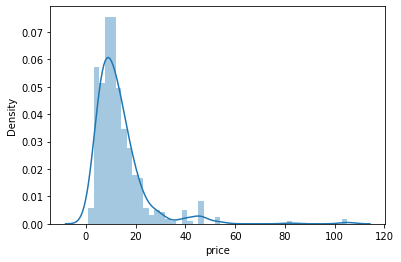

In [38]:

dataset_no_null = dataset[dataset['price'] != 0] #Удалим книги со стоимостью 0
sns_plot = sns.distplot(dataset_no_null['price'])
fig = sns_plot.get_figure()

In [39]:
dataset_no_null.price.describe()

count    538.000000
mean      13.392193
std       10.782447
min        1.000000
25%        7.000000
50%       11.000000
75%       16.000000
max      105.000000
Name: price, dtype: float64




<br>
**Выводы по стоимости книг:** <br>
Т.к. среднее и стандартное отклонение чувствительны к выбросам, опустим их<br>
Из топ 538 продаваемых на амазоне книг, наиболее популярные находятся в диапазоне от 7 долларов, до 16 долларов. Если предположить, что цена играет важное значение при выборе, то, например, можно использовать эту информацию для рекоммендации стоимости товара. Товары, которые находятся вне этих диапазонов, берут намного реже. 



In [29]:
genre = dataset_clear.groupby('genre').author.agg('count').to_frame('count').reset_index()
genre

,genre,count
0,Fiction,160
1,Non Fiction,191


Наиболее популярные книги основаны на реальных событиях, хотя отклонение не сильно велико. 